## Notas originales: [12 steps to N-S](https://www.theoj.org/jose-papers/jose.00021/10.21105.jose.00021.pdf)

#Convección no lineal en una dimensión (segunda clase)
----------------------------------------

En una dimensión la covección esta dada por la ecuación
\begin{equation}
\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = 0,
\end{equation}
la solución $u$ en el segundo termino vuelve a la ecuación no lineal.

Al que igual que en la convección lineal, se utiliza el mismo proceso de discretización en la ecuación
\begin{equation}
\frac{u_i^{n+1}-u_i^n}{\Delta t} + u^{n}_{i} \frac{u_i^n - u_{i-1}^n}{\Delta x} = 0,
\end{equation}
y se busca resolver para el término desconcido
\begin{equation}
u_i^{n+1} = u_i^n - u^{n}_{i} \frac{\Delta t}{\Delta x}(u_i^n-u_{i-1}^n).
\end{equation}

#Ejemplo
-----------------------------------
Realizamos un ejemplo para la función pulso
\begin{equation}
u(x_0, x_l, x)= \left\{ \begin{array}{lcc}
             1 &   si  & x < x_0 \\
             \\ 2 &  si & x_0 \leq x < x_l \\
             \\ 1 &  si  & x > x_l 
             \end{array}
   \right.,
\end{equation}
la razon por la que se ha elevado al pulso, es que, el termino no lineal vuelve cero toda la equación para los $u_i = 0$.

Se implementa un codigo parecido al de la conveción lineal

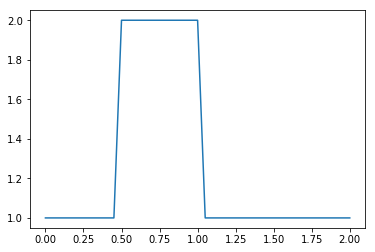

In [0]:
import numpy as np #importa numpy.
import matplotlib.pyplot as plt #importa la herramienta para graficar
%matplotlib inline
#hace que las gráficas aparescan en la siguiente linea

def pulso(x0, x1, x): #define la función pulso
  if x < x0 or x > x1:
    return(1.0)
  else:
    return(2.0)

L = 2 #el tamaño de nuestro intervalo en x
nx = 41 #el número en que se va a discretizar la variable x
dx = L/(nx-1) #la distancia que hay entre cada punto discretizado x (dx)
T = 1.0 #intervalo total de tiempo
nt = 51 #número de veces que se discretiza la variable tiempo
dt = T/(nt-1) #tamaño de los intervalos de tiempo (dt)
c = 1.0 #velocidad de la onda (e.d.)
u = np.linspace(0, L, nx) #np.linspace genera un vector con nx entradas que contiene números igualmente espaciados en un intervalo (0,L)
x = np.linspace(0, L, nx) #generamos dos porque uno va a entrar a la funcion pulso
#print(u) #u = x en este caso

for i in range(len(x)):
  u[i] = pulso(0.5, 1.0, x[i]) #es de hecho la condicion inicial

#print(u) #x ahora esta evaluada en la función pulso

plt.plot(x,u)

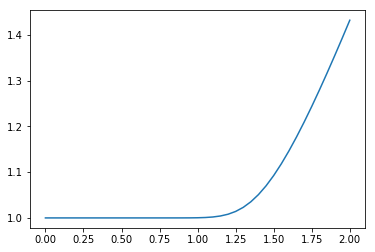

In [0]:
un = np.zeros(nx) #crea un vector temporal de tamaño nx con entradas ceros
for n in range(nt): #genera el loop nt veces
  un = u.copy() #copia los elementos de u al vector temporal un
  for i in range(1,nx): #el loop realiza las operaciones para calcular el u^{n+1}_{i}, pero comienza con el elemento u[1] y no u[o] (se salta el primer elemento)
    u[i] = un[i]- un[i]*dt*(un[i]-un[i-1])/dx

plt.plot(x,u)